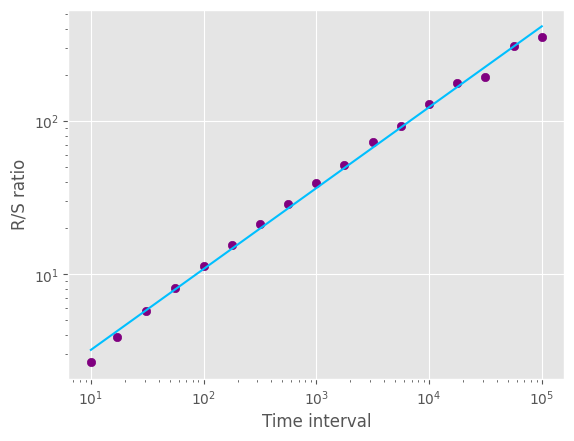

H=0.5279, c=0.9531


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc, random_walk

# Use random_walk() function or generate a random walk series manually:
# series = random_walk(99999, cumprod=True)
np.random.seed(42)
random_changes = 1. + np.random.randn(99999) / 1000.
series = np.cumprod(random_changes)  # create a random walk from random changes

# Evaluate Hurst equation
H, c, data = compute_Hc(series, kind='price', simplified=False)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

# SP500 historical, 2023 to 2024

In [71]:
from fmp_data import FMPPriceLoader

pl = FMPPriceLoader()
spx = pl.get_close_price_during('^SPX', '2008-01-01', '2010-11-01')

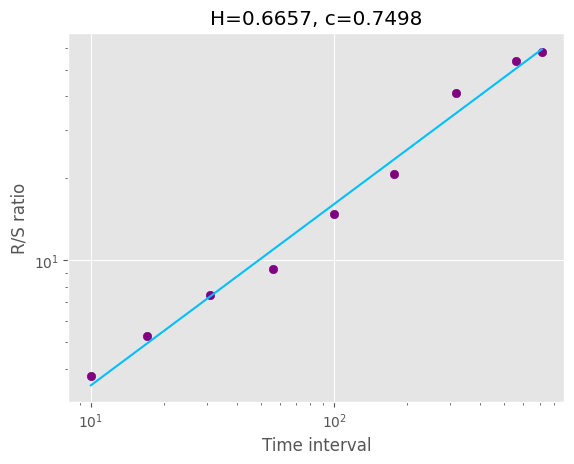

In [84]:
spot = list(spx.values())
n = len(spot)
# spot = [p / spot[0] for p in spot]
# spot = [spot[i+1] / spot[i] for i in range(n-1)]

# Evaluate Hurst equation
H, c, data = compute_Hc(spot, kind='price', simplified=True)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.title("H={:.4f}, c={:.4f}".format(H,c))
plt.show()



# SPX since 2025-02, Tarrif threat

In [81]:
import yfinance as yf
from datetime import datetime

# Download SPX data from February 18, 2025 to March 21, 2025
spx_data = yf.download('^GSPC', start='2022-10-22', end='2025-03-21')
# Convert numpy array to list
tf = spx_data['Close'].values.flatten().tolist()
print(len(tf))

[*********************100%***********************]  1 of 1 completed

603


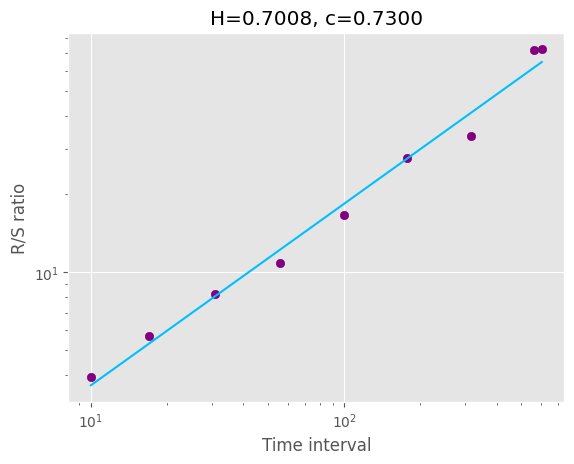

In [83]:
# Evaluate Hurst equation
H, c, data = compute_Hc(tf, kind='price', simplified=True)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.title("H={:.4f}, c={:.4f}".format(H,c))
plt.show()

# Scratchpad

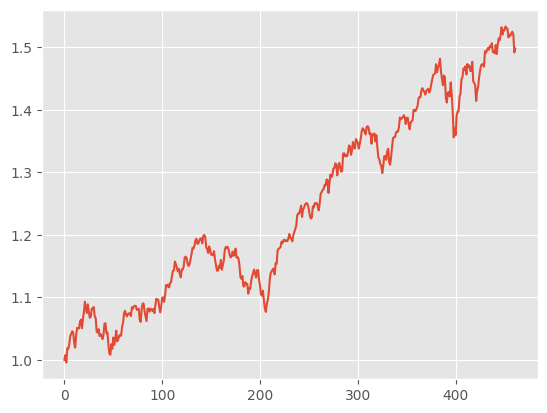

In [16]:
plt.plot(spot)